# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('merged_data.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 39
        GEOID NAME    moe population means_transit med_inc CRASH.DATE CRASH.TIME
        <dbl> <chr> <dbl>      <dbl>         <dbl>   <dbl> <date>     <time>    
1 36005000100 Cens…   702       6661            NA      NA NA            NA     
2 36005000100 Cens…    18         NA             0      NA NA            NA     
3 36005000100 Cens…    NA         NA            NA      NA NA            NA     
4 36005000200 Cens…   563       4453            NA      NA NA            NA     
# ℹ 31 more variables: BOROUGH <chr>, ZIP.CODE <dbl>, LATITUDE <dbl>,
#   LONGITUDE <dbl>, LOCATION <chr>, ON.STREET.NAME <chr>,
#   CROSS.STREET.NAME <chr>, OFF.STREET.NAME <chr>,
#   NUMBER.OF.PERSONS.INJURED <dbl>, NUMBER.OF.PERSONS.KILLED <dbl>,
#   NUMBER.OF.PEDESTRIANS.INJURED <dbl>, NUMBER.OF.PEDESTRIANS.KILLED <dbl>,
#   NUMBER.OF.CYCLIST.INJURED <dbl>, NUMBER.OF.CYCLIST.KILLED <dbl>,
#   NUMBER.OF.MOTORIST.INJURED <dbl>, NUMBER.OF.MOTORIST.KILLED <dbl>, …


In [18]:
%%R
library(dplyr)

# Group by BOROUGH and summarize the total number of persons killed and injured
borough_summary <- df %>%
  group_by(BOROUGH) %>%
  summarise(
    Total_Killed = sum(NUMBER.OF.PERSONS.KILLED, na.rm = TRUE),
    Total_Injured = sum(NUMBER.OF.PERSONS.INJURED, na.rm = TRUE)
  )

# Display the summary
print(borough_summary)


# A tibble: 6 × 3
  BOROUGH       Total_Killed Total_Injured
  <chr>                <dbl>         <dbl>
1 BRONX                    6          1929
2 BROOKLYN                18          4028
3 MANHATTAN                6          1765
4 QUEENS                  18          3059
5 STATEN ISLAND            0           467
6 <NA>                    23          5054


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [26]:
%%R 
library(dplyr)

# Filter accidents with "Alcohol involvement" as the contributing factor for vehicle 1,
# then group by GEOID and BOROUGH, and summarize the total number of persons killed
accidents_summary <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Alcohol Involvement") %>%
  group_by(GEOID, BOROUGH) %>%
  summarise(
    Total_Persons_Killed = sum(NUMBER.OF.PERSONS.KILLED, na.rm = TRUE),
    .groups = 'drop' # This drops the grouping structure afterwards
  ) %>%
  arrange(desc(Total_Persons_Killed)) # Arrange from highest to lowest number of persons killed

# Display the summary
print(accidents_summary)




# A tibble: 175 × 3
         GEOID BOROUGH       Total_Persons_Killed
         <dbl> <chr>                        <dbl>
 1 36005001600 BROOKLYN                         0
 2 36005004200 QUEENS                           0
 3 36005004400 <NA>                             0
 4 36005005100 QUEENS                           0
 5 36005005902 <NA>                             0
 6 36005006000 BROOKLYN                         0
 7 36005006500 QUEENS                           0
 8 36005006800 STATEN ISLAND                    0
 9 36005007800 <NA>                             0
10 36005011502 QUEENS                           0
# ℹ 165 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

mtcars %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [35]:
%%R 
library(dplyr)
library(ggplot2)

# Filter accidents with "Alcohol involvement" as the contributing factor for vehicle 1,
# then group by GEOID and BOROUGH, and summarize the total number of persons killed
accidents_summary <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Alcohol Involvement") %>%
  group_by(GEOID, BOROUGH) %>%
  summarise(
    Total_Persons_Injured = sum(NUMBER.OF.PERSONS.INJURED, na.rm = TRUE),
    .groups = 'drop' # This drops the grouping structure afterwards
  ) %>%
  arrange(desc(Total_Persons_Injured)) # Arrange from highest to lowest number of persons killed

# Display the summary
print(accidents_summary)





# A tibble: 175 × 3
         GEOID BOROUGH   Total_Persons_Injured
         <dbl> <chr>                     <dbl>
 1 36061017200 <NA>                         21
 2 36061016100 BRONX                        15
 3 36081099200 BRONX                        15
 4 36047102801 BRONX                        12
 5 36081062600 <NA>                         12
 6 36081094700 <NA>                         12
 7 36005035000 BROOKLYN                      9
 8 36047017800 <NA>                          9
 9 36047046201 MANHATTAN                     9
10 36061019400 <NA>                          9
# ℹ 165 more rows
# ℹ Use `print(n = ...)` to see more rows


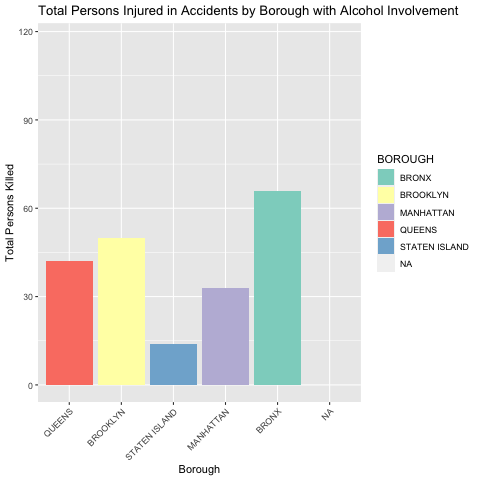

In [39]:
%%R
library(dplyr)
library(ggplot2)

ggplot(accidents_summary, aes(x = reorder(BOROUGH, Total_Persons_Injured), y = Total_Persons_Injured, fill = BOROUGH)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate X-axis labels for better readability
  labs(x = "Borough", y = "Total Persons Killed", title = "Total Persons Injured in Accidents by Borough with Alcohol Involvement") +
  scale_fill_brewer(palette = "Set3") # Use a color palette for aesthetic purposes

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 rows containing missing values (`position_stack()`). 

R[write to console]: 2: Removed 43 rows containing missing values (`geom_bar()`). 



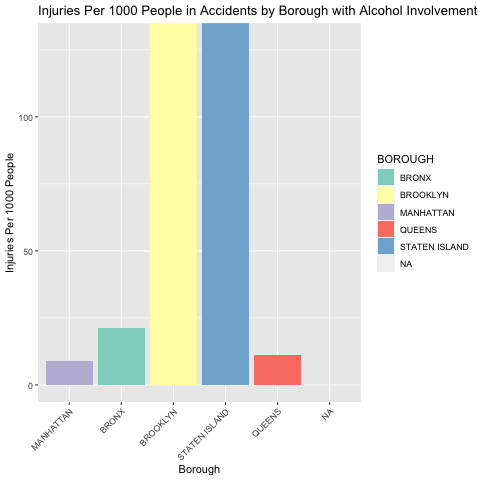

In [40]:
%%R
library(dplyr)
library(ggplot2)
library(dplyr)
library(ggplot2)

# Filter accidents with "Alcohol Involvement" as the contributing factor for vehicle 1,
# then group by GEOID and BOROUGH, and summarize the total number of persons injured
# Now also including the total population for each group to calculate injuries per capita
accidents_summary <- df %>%
  filter(CONTRIBUTING.FACTOR.VEHICLE.1 == "Alcohol Involvement") %>%
  group_by(GEOID, BOROUGH) %>%
  summarise(
    Total_Persons_Injured = sum(NUMBER.OF.PERSONS.INJURED, na.rm = TRUE),
    Population = sum(population, na.rm = TRUE), # Assuming summing is appropriate if population is repeated per GEOID
    .groups = 'drop' # This drops the grouping structure afterwards
  ) %>%
  mutate(Injuries_Per_1000_Pop = (Total_Persons_Injured / Population) * 1000) # Calculate injuries per 1000 people

# Arrange from highest to lowest injuries per capita
accidents_summary <- accidents_summary %>%
  arrange(desc(Injuries_Per_1000_Pop))

# Plot the normalized injuries per 1000 population for each GEOID or BOROUGH
ggplot(accidents_summary, aes(x = reorder(BOROUGH, Injuries_Per_1000_Pop), y = Injuries_Per_1000_Pop, fill = BOROUGH)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate X-axis labels for better readability
  labs(x = "Borough", y = "Injuries Per 1000 People", title = "Injuries Per 1000 People in Accidents by Borough with Alcohol Involvement") +
  scale_fill_brewer(palette = "Set3") # Use a color palette for aesthetic purposes


In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [ ]:
# code for plot 1
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle